# **K-MEANS Algorithm**

K-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.


# **The Goal**

the aim of this project find the best number of clusters can split the dataset


### **The Author** :- **Mina Adel Markos**



# **About Dataset**
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.


# **The columns in this dataset are:**

-  Id
-  SepalLengthCm
-  SepalWidthCm
-  PetalLengthCm
-  PetalWidthCm
-  Species


<center>
<img align="center" src="gh.jpg"     style=" width:700px; padding: 10px; " > 
<center>

### **Importing Libraries**

In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
import kaleido
pio.templates.default = 'plotly_dark'
from sklearn.cluster import KMeans

### **Importing Dataset**

In [24]:
df = pd.read_csv('Iris.csv')

In [25]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
#drop id column from dataset

df.drop(columns=['Id'],inplace=True)

In [27]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### **Plot length and width with species**

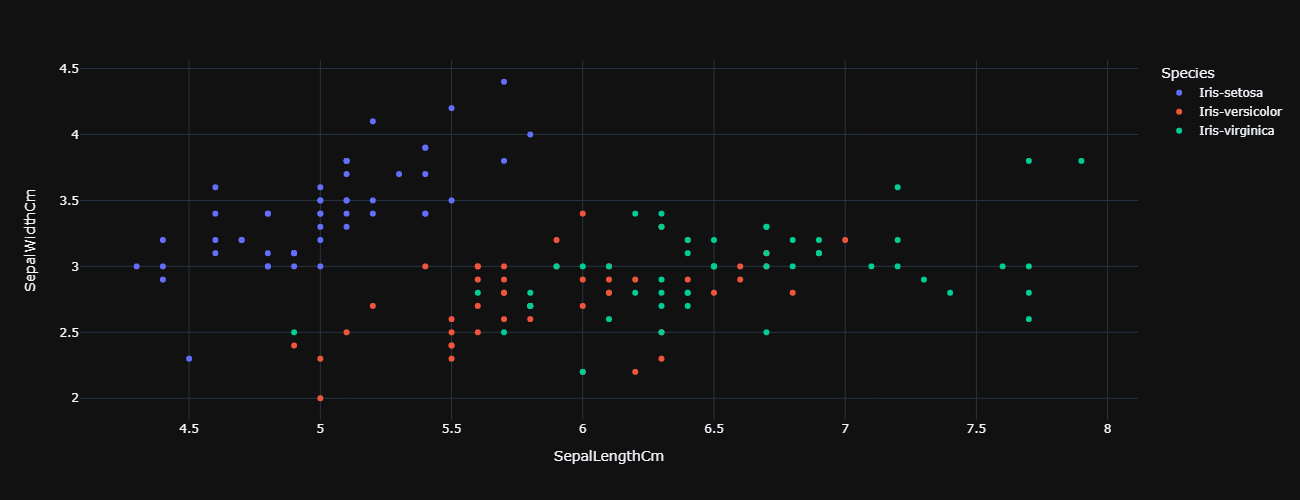

In [28]:
fig1 = px.scatter(df, x='SepalLengthCm',y='SepalWidthCm',color = 'Species')
fig1.show("png",width=1300,height=500)

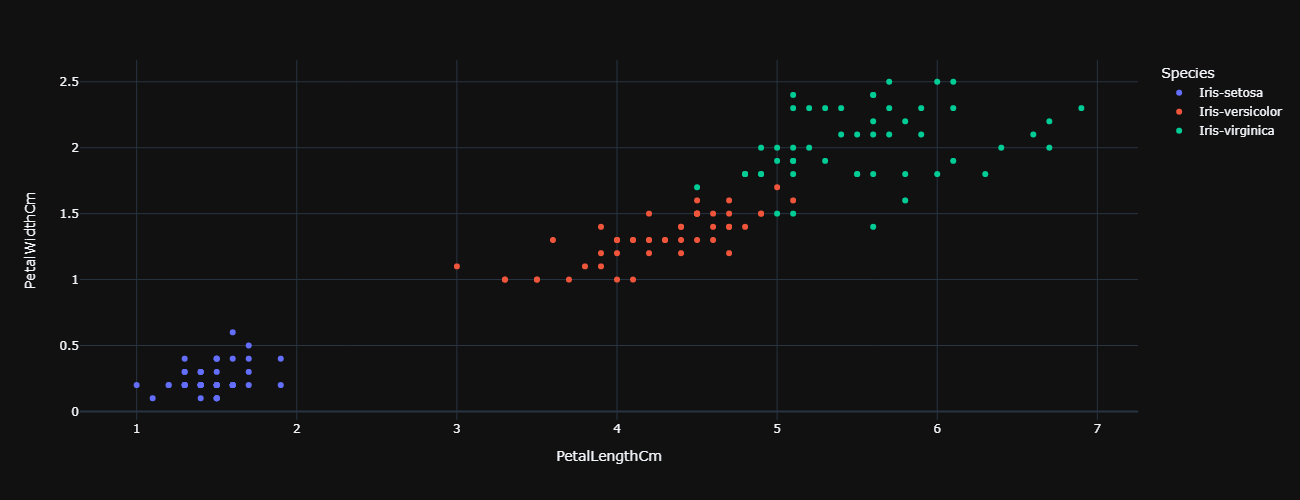

In [29]:
fig1 = px.scatter(df, x='PetalLengthCm',y='PetalWidthCm',color = 'Species')
fig1.show("png",width=1300,height=500)

## **Understanding K-means Clustering in Machine Learning**

- K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

- Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.


<center>
<img align="center" src="256.png"     style=" width:500px; padding: 10px; " > 
<center>

# **Prepare the dataset**

In [30]:
x=df.iloc[:,[0,1,2,3]].values

In [31]:
x[1:10]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

# **ElBow Method**

In order to find the best value for K, we need to run K-means across our data for a range of possible values. We only have 10 data points, so the maximum number of clusters is 10. So for each value K in range(1,11), we train a K-means model and plot the intertia at that number of clusters:



In [32]:
sse = []

for i in range(1,11):
  Kmeans= KMeans(n_clusters=i, init = "k-means++", n_init = 10,  max_iter= 30, random_state=0)

  Kmeans.fit(x)
  sse.append(Kmeans.inertia_)

In [33]:
sse

[680.8244000000001,
 152.36870647733906,
 78.94084142614601,
 57.317873214285726,
 46.56163015873017,
 38.93096304967175,
 34.19068792479663,
 30.063874432733137,
 27.879287878787885,
 26.048202248044355]

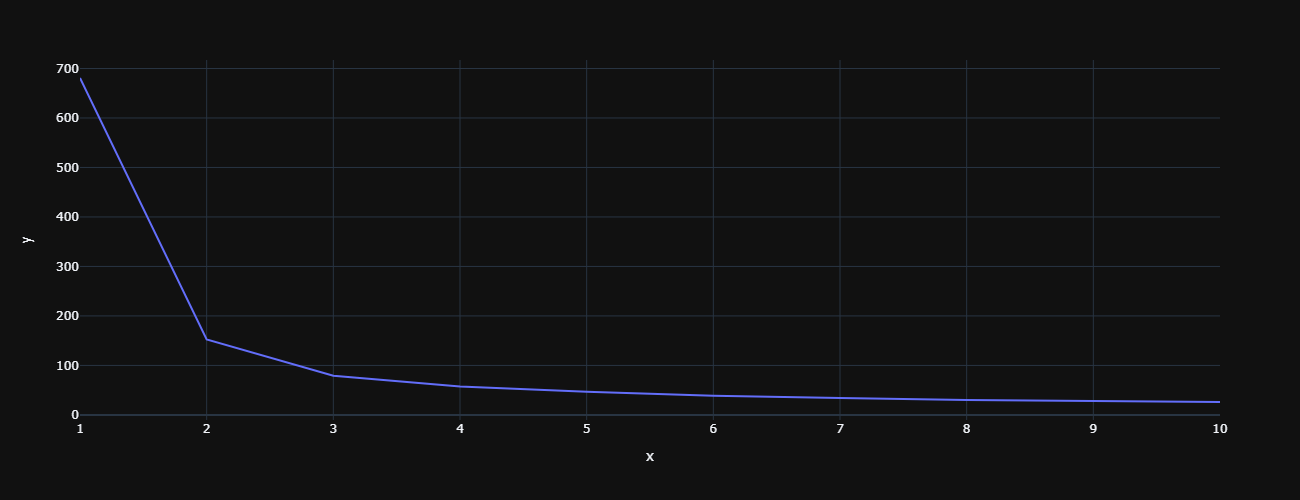

In [34]:
fig1 = px.line(x=range(1,11),y=sse)
fig1.show("png",width=1300,height=500)

We can see that the "elbow" on the graph above is at K=3. We can fit our K-means algorithm and plot the different clusters assigned to the data:



In [35]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [36]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [37]:
df['new_cluster'] = y_kmeans

In [38]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,new_cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [39]:
df['new_cluster'] = df['new_cluster'].astype('str')

# **Difference  between actual clustering and Cluster which predict by algorithm**

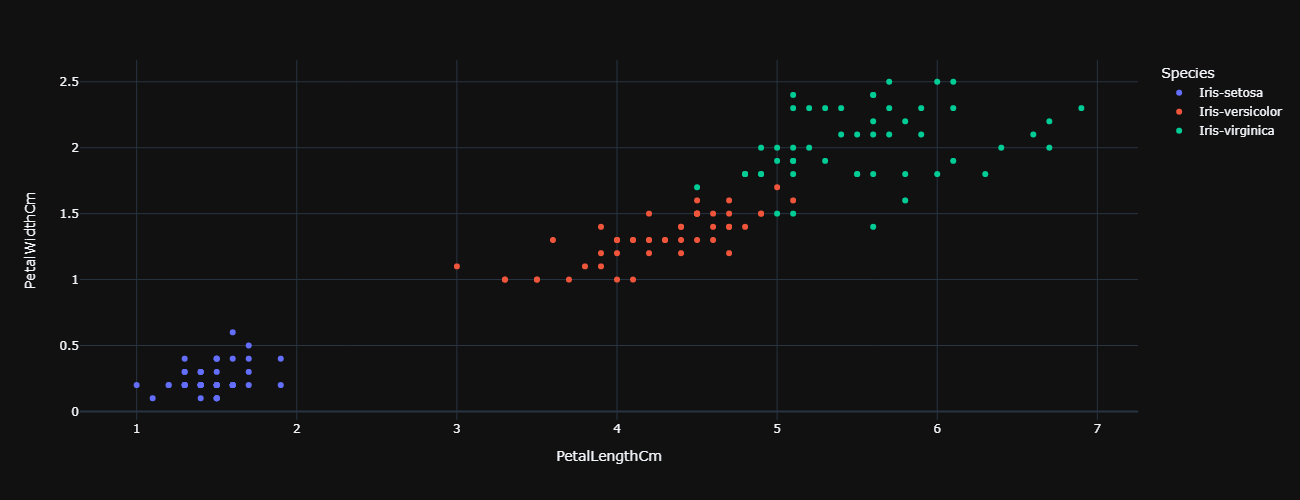

In [40]:
# Actual Clustering
fig1 = px.scatter(df, x='PetalLengthCm',y='PetalWidthCm',color = 'Species')
fig1.show("png",width=1300,height=500)

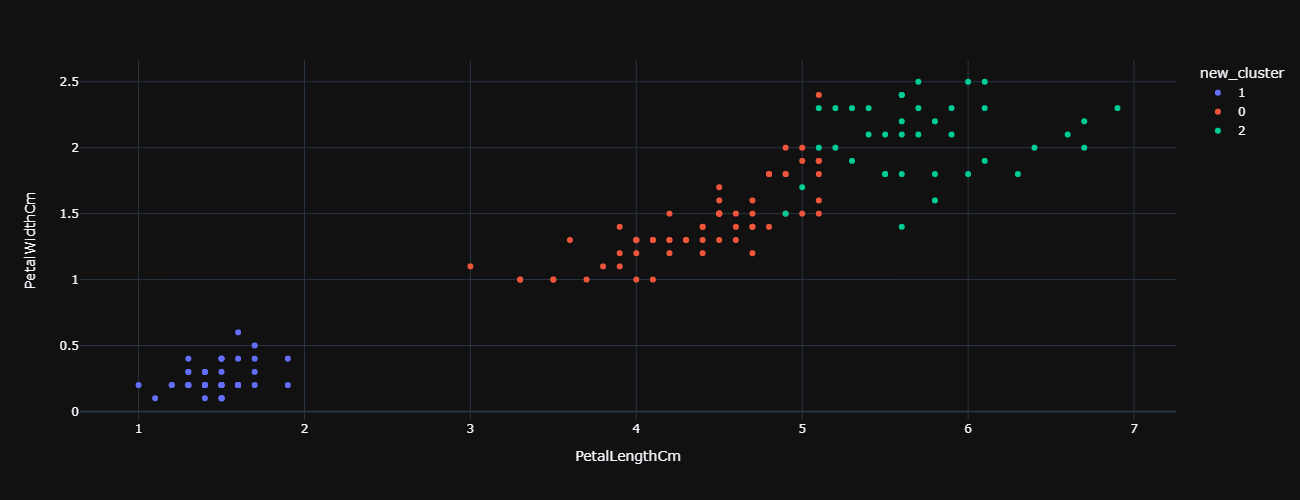

In [41]:
# Result From K-Means Algorithm
fig1 = px.scatter(df, x='PetalLengthCm',y='PetalWidthCm',color = 'new_cluster')
fig1.show("png",width=1300,height=500)

# **THANK YOU**